***Supplementary Anylasis for the Presentation***

In [1]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pandas
import collections
import modules.database as db

Connect to datbase

In [2]:
rs_repo_table = db.RsRepoCollection()

Number of repositories with first commit date in 2019 or 2020

In [3]:
total = rs_repo_table.get_number_of_entries({'main_subject':{'$exists':True}})
sample = rs_repo_table.get_number_of_entries({'$and': [{'main_subject':{'$exists':True}},{'first_commit':{'$regex':'2019|2020'}}]})
print(sample, 'repositories have a first commit date in 2019 or 2020', round(100 * float(sample)/float(total), 2), '%' )
sample = rs_repo_table.get_number_of_entries({'$and': [{'main_subject':{'$exists':True}},
                                                       {'first_commit':{'$regex':'2019|2020'}},
                                                       {'subject':{'$in':['Computer Science']}}
                                                      ]})
print(sample, 'computer science repositories have a first commit date in 2019 or 2020', round(100 * float(sample)/float(total), 2), '%' )

23835 repositories have a first commit date in 2019 or 2020 33.71 %
13024 computer science repositories have a first commit date in 2019 or 2020 18.42 %


Number of repositories in the GitHub sample with first commit date in 2019 or 2020

In [4]:
total = rs_repo_table.get_number_of_entries({'$and': [{'main_subject':{'$exists':True}},{'group': {'$in': ['github']}}]})
sample = rs_repo_table.get_number_of_entries({'$and': [{'group': {'$in': ['github']}},
                                                       {'main_subject':{'$exists':True}},
                                                       {'first_commit':{'$regex':'2019|2020'}}]})
print(sample, 'repositories in the GitHub sample have a first commit date in 2019 or 2020', round(100 * float(sample)/float(total), 2), '%' )
sample = rs_repo_table.get_number_of_entries({'$and': [{'main_subject':{'$exists':True}},
                                                       {'group': {'$in': ['github']}},
                                                       {'first_commit':{'$regex':'2019|2020'}},
                                                       {'subject':{'$in':['Computer Science']}}
                                                      ]})
print(sample, 'computer science repositories in the GitHub sample have a first commit date in 2019 or 2020', round(100 * float(sample)/float(total), 2), '%' )

15366 repositories in the GitHub sample have a first commit date in 2019 or 2020 40.17 %
5745 computer science repositories in the GitHub sample have a first commit date in 2019 or 2020 15.02 %


Lifespan of computer science repositories in the GitHub sample

GitHub sample, active computer science repositories - mean value:  676.1108563722184 ( 21.810027624910273 months)
GitHub sample, dormant computer science repositories - mean value:  449.99118652986056 ( 14.515844726769695 months)
GitHub Sample: Lifespan of computer science repositories: 


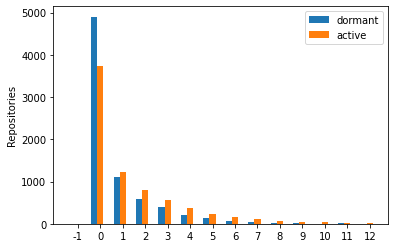

In [5]:
activeI = []
repos = rs_repo_table.get_entries({'$and': [{'live':True}, 
                                            {'group': {'$in': ['github']}},  
                                            {'subject':{'$in':['Computer Science']}},
                                            {'main_subject':{'$exists':True}}]})
for repo in repos:
    activeI.append(repo['lifespan'])
active = [x//365 for x in activeI]
dormantI = []
repos = rs_repo_table.get_entries({'$and': [{'live':False}, 
                                            {'group': {'$in': ['github']}}, 
                                            {'subject':{'$in':['Computer Science']}},
                                            {'main_subject':{'$exists':True}}]})
for repo in repos:
    dormantI.append(repo['lifespan'])
dormant = [x//365 for x in dormantI]

print('GitHub sample, active computer science repositories - mean value: ', np.mean(activeI), '(', np.mean(activeI)/31, 'months)')
print('GitHub sample, dormant computer science repositories - mean value: ', np.mean(dormantI), '(', np.mean(dormantI)/31, 'months)')

keys_active = collections.Counter(active).keys() # equals to list(set(words))
values_active = collections.Counter(active).values() # counts the elements' frequency
keys_dormant = collections.Counter(dormant).keys() # equals to list(set(words))
values_dormant = collections.Counter(dormant).values() # counts the elements' frequency
activeDict = dict(zip(keys_active,values_active))
dormantDict = dict(zip(keys_dormant,values_dormant))

for key in activeDict:
    if not key in dormantDict:
        dormantDict.update({key:0})
for key in dormantDict:
    if not key in activeDict:
        activeDict.update({key:0})

sortedActive = collections.OrderedDict(sorted(activeDict.items()))
sortedDormant = collections.OrderedDict(sorted(dormantDict.items()))

sortedAct = {k: sortedActive[k] for k in sortedActive.keys() if k < 13}
sortedDorm = {k: sortedDormant[k] for k in sortedDormant.keys() if k < 13}

N = len(sortedAct)
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [int(v) for v in sortedDorm.values()]
rects1 = ax.bar(ind, yvals, width)
zvals = [int(v) for v in sortedAct.values()]
rects2 = ax.bar(ind+width, zvals, width)

ax.set_ylabel('Repositories')
ax.set_xticks(ind+width)
ax.set_xticklabels( [k for k in sortedAct.keys()] )
ax.legend( (rects1[0], rects2[0]), ('dormant', 'active') )

print('GitHub Sample: Lifespan of computer science repositories: ')
plt.show()

Lifespan of computer science (only) repositories in the GitHub sample

GitHub sample, active computer science repositories - mean value:  491.04848484848486 ( 15.840273704789833 months)
GitHub sample, dormant computer science repositories - mean value:  nan ( nan months)
GitHub Sample: Lifespan of computer science, not interdisciplinary repositories: 


/home/count/python-virtual-environments/venv_final/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/count/python-virtual-environments/venv_final/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


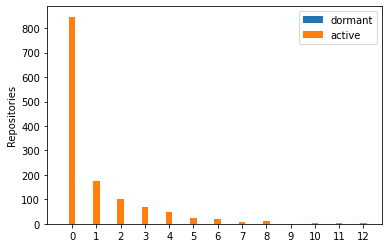

In [6]:
activeI = []
repos = rs_repo_table.get_entries({'$and': [{'live':True}, 
                                            {'group': {'$in': ['github']}},  
                                            {'subject':{'$in':['Computer Science']}},
                                            {'subject':{'$size':1}},
                                            {'main_subject':{'$exists':True}}]})
for repo in repos:
    activeI.append(repo['lifespan'])
active = [x//365 for x in activeI]
dormantI = []
repos = rs_repo_table.get_entries({'$and': [{'live':False}, 
                                            {'group': {'$in': ['github']}}, 
                                            {'subject':{'$in':['Computer Science']}},
                                            {'subject':{'size':1}},
                                            {'main_subject':{'$exists':True}}]})
for repo in repos:
    dormantI.append(repo['lifespan'])
dormant = [x//365 for x in dormantI]

print('GitHub sample, active computer science repositories - mean value: ', np.mean(activeI), '(', np.mean(activeI)/31, 'months)')
print('GitHub sample, dormant computer science repositories - mean value: ', np.mean(dormantI), '(', np.mean(dormantI)/31, 'months)')

keys_active = collections.Counter(active).keys() # equals to list(set(words))
values_active = collections.Counter(active).values() # counts the elements' frequency
keys_dormant = collections.Counter(dormant).keys() # equals to list(set(words))
values_dormant = collections.Counter(dormant).values() # counts the elements' frequency
activeDict = dict(zip(keys_active,values_active))
dormantDict = dict(zip(keys_dormant,values_dormant))

for key in activeDict:
    if not key in dormantDict:
        dormantDict.update({key:0})
for key in dormantDict:
    if not key in activeDict:
        activeDict.update({key:0})

sortedActive = collections.OrderedDict(sorted(activeDict.items()))
sortedDormant = collections.OrderedDict(sorted(dormantDict.items()))

sortedAct = {k: sortedActive[k] for k in sortedActive.keys() if k < 13}
sortedDorm = {k: sortedDormant[k] for k in sortedDormant.keys() if k < 13}

N = len(sortedAct)
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [int(v) for v in sortedDorm.values()]
rects1 = ax.bar(ind, yvals, width)
zvals = [int(v) for v in sortedAct.values()]
rects2 = ax.bar(ind+width, zvals, width)

ax.set_ylabel('Repositories')
ax.set_xticks(ind+width)
ax.set_xticklabels( [k for k in sortedAct.keys()] )
ax.legend( (rects1[0], rects2[0]), ('dormant', 'active') )

print('GitHub Sample: Lifespan of computer science, not interdisciplinary repositories: ')
plt.show()

Lifespan of computational science repositories

GitHub sample, active computational science repositories - mean value:  564.7601038511467 ( 18.218067866166024 months)
GitHub sample, dormant computational science repositories - mean value:  354.1727856225931 ( 11.424928568470746 months)
GitHub Sample: Lifespan of computational science repositories: 


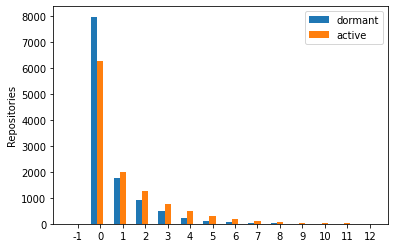

In [7]:
activeI = []
repos = rs_repo_table.get_entries({'$and': [{'live':True}, 
                                            {'group': {'$in': ['github']}},  
                                            {'subject':{'$nin':['Computer Science']}},
                                            {'main_subject':{'$exists':True}}]})
for repo in repos:
    activeI.append(repo['lifespan'])
active = [x//365 for x in activeI]
dormantI = []
repos = rs_repo_table.get_entries({'$and': [{'live':False}, 
                                            {'group': {'$in': ['github']}}, 
                                            {'subject':{'$nin':['Computer Science']}},
                                            {'main_subject':{'$exists':True}}]})
for repo in repos:
    dormantI.append(repo['lifespan'])
dormant = [x//365 for x in dormantI]

print('GitHub sample, active computational science repositories - mean value: ', np.mean(activeI), '(', np.mean(activeI)/31, 'months)')
print('GitHub sample, dormant computational science repositories - mean value: ', np.mean(dormantI), '(', np.mean(dormantI)/31, 'months)')

keys_active = collections.Counter(active).keys() # equals to list(set(words))
values_active = collections.Counter(active).values() # counts the elements' frequency
keys_dormant = collections.Counter(dormant).keys() # equals to list(set(words))
values_dormant = collections.Counter(dormant).values() # counts the elements' frequency
activeDict = dict(zip(keys_active,values_active))
dormantDict = dict(zip(keys_dormant,values_dormant))

for key in activeDict:
    if not key in dormantDict:
        dormantDict.update({key:0})
for key in dormantDict:
    if not key in activeDict:
        activeDict.update({key:0})

sortedActive = collections.OrderedDict(sorted(activeDict.items()))
sortedDormant = collections.OrderedDict(sorted(dormantDict.items()))

sortedAct = {k: sortedActive[k] for k in sortedActive.keys() if k < 13}
sortedDorm = {k: sortedDormant[k] for k in sortedDormant.keys() if k < 13}

N = len(sortedAct)
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [int(v) for v in sortedDorm.values()]
rects1 = ax.bar(ind, yvals, width)
zvals = [int(v) for v in sortedAct.values()]
rects2 = ax.bar(ind+width, zvals, width)

ax.set_ylabel('Repositories')
ax.set_xticks(ind+width)
ax.set_xticklabels( [k for k in sortedAct.keys()] )
ax.legend( (rects1[0], rects2[0]), ('dormant', 'active') )

print('GitHub Sample: Lifespan of computational science repositories: ')
plt.show()

Computational science repositories with first commit date before 2019

GitHub sample, active computational science repositories - mean value:  1601.0277447483154 ( 51.64605628220372 months)
GitHub sample, dormant computational science repositories - mean value:  520.9629027490394 ( 16.805254927388365 months)
GitHub Sample: Lifespan of computational science repositories, first commit date before 2019: 


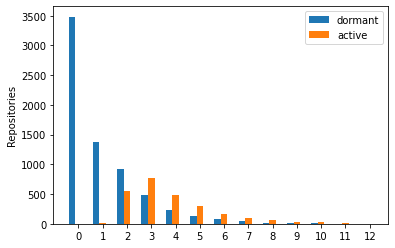

In [8]:
activeI = []
repos = rs_repo_table.get_entries({'$and': [{'live':True}, 
                                            {'group': {'$in': ['github']}},  
                                            {'subject':{'$nin':['Computer Science']}},
                                            {'main_subject':{'$exists':True}},
                                            {'first_commit':{'$regex': r'2008|2009|2010|2011|2012|2013|2014|2015|2016|2017'}}                                           
                                           ]})
for repo in repos:
    activeI.append(repo['lifespan'])
active = [x//365 for x in activeI]
dormantI = []
repos = rs_repo_table.get_entries({'$and': [{'live':False}, 
                                            {'group': {'$in': ['github']}}, 
                                            {'subject':{'$nin':['Computer Science']}},
                                            {'main_subject':{'$exists':True}},
                                            {'first_commit':{'$regex': r'2008|2009|2010|2011|2012|2013|2014|2015|2016|2017'}}
                                           ]})
for repo in repos:
    dormantI.append(repo['lifespan'])
dormant = [x//365 for x in dormantI]

print('GitHub sample, active computational science repositories - mean value: ', np.mean(activeI), '(', np.mean(activeI)/31, 'months)')
print('GitHub sample, dormant computational science repositories - mean value: ', np.mean(dormantI), '(', np.mean(dormantI)/31, 'months)')

keys_active = collections.Counter(active).keys() # equals to list(set(words))
values_active = collections.Counter(active).values() # counts the elements' frequency
keys_dormant = collections.Counter(dormant).keys() # equals to list(set(words))
values_dormant = collections.Counter(dormant).values() # counts the elements' frequency
activeDict = dict(zip(keys_active,values_active))
dormantDict = dict(zip(keys_dormant,values_dormant))

for key in activeDict:
    if not key in dormantDict:
        dormantDict.update({key:0})
for key in dormantDict:
    if not key in activeDict:
        activeDict.update({key:0})

sortedActive = collections.OrderedDict(sorted(activeDict.items()))
sortedDormant = collections.OrderedDict(sorted(dormantDict.items()))

sortedAct = {k: sortedActive[k] for k in sortedActive.keys() if k < 13}
sortedDorm = {k: sortedDormant[k] for k in sortedDormant.keys() if k < 13}

N = len(sortedAct)
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [int(v) for v in sortedDorm.values()]
rects1 = ax.bar(ind, yvals, width)
zvals = [int(v) for v in sortedAct.values()]
rects2 = ax.bar(ind+width, zvals, width)

ax.set_ylabel('Repositories')
ax.set_xticks(ind+width)
ax.set_xticklabels( [k for k in sortedAct.keys()] )
ax.legend( (rects1[0], rects2[0]), ('dormant', 'active') )

print('GitHub Sample: Lifespan of computational science repositories, first commit date before 2019: ')
plt.show()

Computer science repositories lifespan with first commit before 2019

GitHub sample, active computer science repositories - mean value:  1753.1872074882995 ( 56.55442604800966 months)
GitHub sample, dormant computer science repositories - mean value:  620.2823529411764 ( 20.009108159392788 months)
GitHub Sample: Lifespan of computer science repositories: 


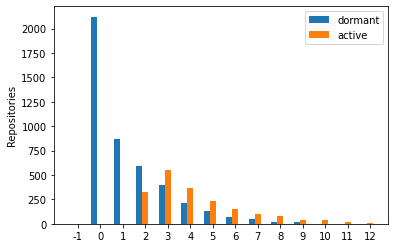

In [9]:
# github group
# description of the subsample - repository lifetime sorted by life and dormant
activeI = []
repos = rs_repo_table.get_entries({'$and': [{'live':True}, 
                                            {'group': {'$in': ['github']}},  
                                            {'subject':{'$in':['Computer Science']}},
                                            {'main_subject':{'$exists':True}},
                                            {'first_commit':{'$regex': r'2008|2009|2010|2011|2012|2013|2014|2015|2016|2017'}}                                           
                                           ]})
for repo in repos:
    activeI.append(repo['lifespan'])
active = [x//365 for x in activeI]
dormantI = []
repos = rs_repo_table.get_entries({'$and': [{'live':False}, 
                                            {'group': {'$in': ['github']}}, 
                                            {'subject':{'$in':['Computer Science']}},
                                            {'main_subject':{'$exists':True}},
                                            {'first_commit':{'$regex': r'2008|2009|2010|2011|2012|2013|2014|2015|2016|2017'}}
                                           ]})
for repo in repos:
    dormantI.append(repo['lifespan'])
dormant = [x//365 for x in dormantI]

print('GitHub sample, active computer science repositories - mean value: ', np.mean(activeI), '(', np.mean(activeI)/31, 'months)')
print('GitHub sample, dormant computer science repositories - mean value: ', np.mean(dormantI), '(', np.mean(dormantI)/31, 'months)')

keys_active = collections.Counter(active).keys() # equals to list(set(words))
values_active = collections.Counter(active).values() # counts the elements' frequency
keys_dormant = collections.Counter(dormant).keys() # equals to list(set(words))
values_dormant = collections.Counter(dormant).values() # counts the elements' frequency
activeDict = dict(zip(keys_active,values_active))
dormantDict = dict(zip(keys_dormant,values_dormant))

for key in activeDict:
    if not key in dormantDict:
        dormantDict.update({key:0})
for key in dormantDict:
    if not key in activeDict:
        activeDict.update({key:0})

sortedActive = collections.OrderedDict(sorted(activeDict.items()))
sortedDormant = collections.OrderedDict(sorted(dormantDict.items()))

sortedAct = {k: sortedActive[k] for k in sortedActive.keys() if k < 13}
sortedDorm = {k: sortedDormant[k] for k in sortedDormant.keys() if k < 13}

N = len(sortedAct)
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [int(v) for v in sortedDorm.values()]
rects1 = ax.bar(ind, yvals, width)
zvals = [int(v) for v in sortedAct.values()]
rects2 = ax.bar(ind+width, zvals, width)

ax.set_ylabel('Repositories')
ax.set_xticks(ind+width)
ax.set_xticklabels( [k for k in sortedAct.keys()] )
ax.legend( (rects1[0], rects2[0]), ('dormant', 'active') )

print('GitHub Sample: Lifespan of computer science repositories, first commit before 2019: ')
plt.show()